In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import *

# Part 1: Regression on California Test Scores

## 1.0 Setup

### 1. Find the url for the California Test Score Data Set from the [following website](https://vincentarelbundock.github.io/Rdatasets/datasets.html)



### 2. Read through the "DOC" file to understand the variables in the dataset

#### The California Test Score Dataset

Doc file can be found [here](https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Caschool.html).

Dataframe with 420 observations (schools) in California with data from 1998-1999

Source: California Department of Education http://www.cde.ca.gov.
References: Stock, James H. and Mark W. Watson (2003) Introduction to Econometrics, Addison-Wesley Educational Publishers, chapter 4–7.

##### Columns
* distcod - district code
* county - county
* district - district
* grspan - grade span of district
* enrltot - total enrollment
* teachers - number of teachers
* calwpct - percent qualifying for [CalWorks](https://www.cdss.ca.gov/calworks)
* mealpct - percent qualifying for reduced-price lunch
* computer - number of computers
* **testscr - average test score (read.scr+math.scr)/2**
* compstu - computer per student
* expnstu - expenditure per student
* str - student teacher ratio
* avginc - district average income
* elpct - percent of English learners
* readscr - average reading score
* mathscr - average math score

### 3. Use the [following url](https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv) to import the data



In [0]:
df_caschool = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")
df_caschool.head()

,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


In [0]:
df_caschool.describe()

,Unnamed: 0,distcod,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,210.500000,67472.809524,2628.792857,129.067376,13.246042,44.705237,303.383333,654.156548,0.135927,5312.407541,19.640425,15.316588,15.768155,654.970477,653.342619
std,121.387808,3466.994655,3913.104985,187.912679,11.454821,27.123381,441.341298,19.053348,0.064956,633.937053,1.891812,7.225890,18.285927,20.107980,18.754202
min,1.000000,61382.000000,81.000000,4.850000,0.000000,0.000000,0.000000,605.550049,0.000000,3926.069580,14.000000,5.335000,0.000000,604.500000,605.400024
25%,105.750000,64307.750000,379.000000,19.662499,4.395375,23.282200,46.000000,640.049988,0.093767,4906.180054,18.582360,10.639000,1.940807,640.400024,639.375015
50%,210.500000,67760.500000,950.500000,48.564999,10.520450,41.750700,117.500000,654.449982,0.125464,5214.516602,19.723208,13.727800,8.777634,655.750000,652.449982
75%,315.250000,70419.000000,3008.000000,146.350002,18.981350,66.864725,375.250000,666.662506,0.164466,5601.401367,20.871815,17.629001,22.970003,668.725006,665.849991
max,420.000000,75440.000000,27176.000000,1429.000000,78.994202,100.000000,3324.000000,706.750000,0.420833,7711.506836,25.799999,55.327999,85.539719,704.000000,709.500000


### 4. Understanding Features

The target data (i.e. the dependent variable) is named "testscr".  You can use all variables in the data except for "readscr" and "mathscr" in the following analysis.  (These two variables were used to generate the dependent variable).

## 1.1 Univariate Visualisation

Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.

Variables: 

* **testscr - Student average test scores**
* str - teacher to student ratio
* expnstu - expenditure per student
* avginc - district average income

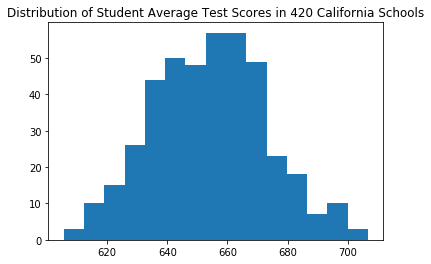

In [0]:
plt.figure()
plt.hist(df_caschool.testscr, bins = 15)
plt.title("Distribution of Student Average Test Scores in 420 California Schools")
plt.show()

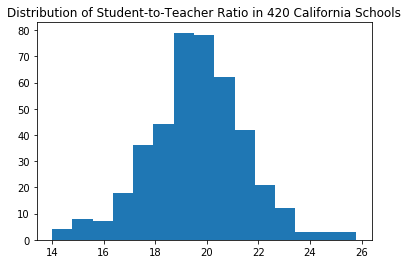

In [0]:
plt.figure()
plt.hist(df_caschool.str, bins = 15)
plt.title("Distribution of Student-to-Teacher Ratio in 420 California Schools")
plt.show()

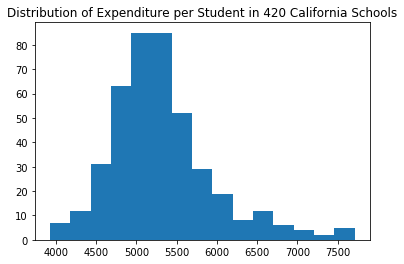

In [0]:
plt.figure()
plt.hist(df_caschool.expnstu, bins = 15)
plt.title("Distribution of Expenditure per Student in 420 California Schools")
plt.show()

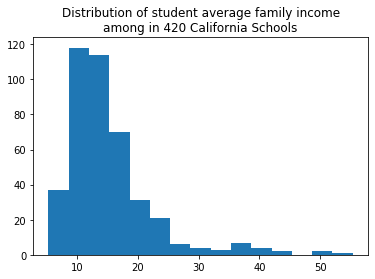

In [0]:
plt.figure()
plt.hist(df_caschool.avginc, bins = 15)
plt.title("Distribution of student average family income\namong in 420 California Schools")
plt.show()

## 1.2 Bivariate Visualisation

Visualize the dependency of the target on each feature from 1.1.

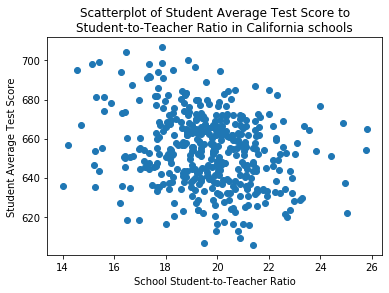

In [0]:
plt.figure()
plt.scatter(x = df_caschool.str,
            y = df_caschool.testscr)
plt.title("Scatterplot of Student Average Test Score to\nStudent-to-Teacher Ratio in California schools")
plt.xlabel("School Student-to-Teacher Ratio")
plt.ylabel("Student Average Test Score")
plt.show()

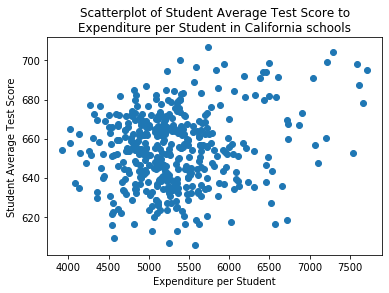

In [0]:
plt.figure()
plt.scatter(x = df_caschool.expnstu,
            y = df_caschool.testscr)
plt.title("Scatterplot of Student Average Test Score to\nExpenditure per Student in California schools")
plt.xlabel("Expenditure per Student")
plt.ylabel("Student Average Test Score")
plt.show()

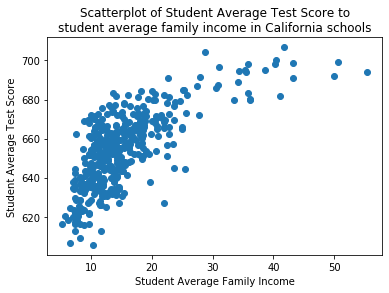

In [0]:
plt.figure()
plt.scatter(x = df_caschool.avginc,
            y = df_caschool.testscr)
plt.title("Scatterplot of Student Average Test Score to\nstudent average family income in California schools")
plt.xlabel("Student Average Family Income")
plt.ylabel("Student Average Test Score")
plt.show()

## 1.3 Initial model Training

#### Pre-processing
1. Remove columns
  - Unnamed: 0, distcod - Identifier
  - district - categorical feature with 409 unique values. To turn this into dummy variables would create far too many features
  - readscr, mathscr - Can't use these as they are used to compute the target feature
2. Dummy code Categorical variables
  - grspan - 2 levels
  - county - 45 levels

In [0]:
df_caschool_features_undummy = df_caschool.drop(['Unnamed: 0',
                                                 'distcod',
                                                 'district',
                                                 'readscr',
                                                 'mathscr'],
                                                axis = 1)
df_caschool_features_undummy.head()

,county,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct
0,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000
1,Butte,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333
2,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002
3,Butte,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000
4,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677


In [0]:
df_caschool_features_dummy = pd.get_dummies(df_caschool_features_undummy,
                                            columns = ['county', 'grspan'])
df_caschool_features_dummy.head()

,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,county_Alameda,county_Butte,county_Calaveras,county_Contra Costa,county_El Dorado,county_Fresno,county_Glenn,county_Humboldt,county_Imperial,county_Inyo,county_Kern,county_Kings,county_Lake,county_Lassen,county_Los Angeles,county_Madera,county_Marin,county_Mendocino,county_Merced,county_Monterey,county_Nevada,county_Orange,county_Placer,county_Riverside,county_Sacramento,county_San Benito,county_San Bernardino,county_San Diego,county_San Joaquin,county_San Luis Obispo,county_San Mateo,county_Santa Barbara,county_Santa Clara,county_Santa Cruz,county_Shasta,county_Siskiyou,county_Sonoma,county_Stanislaus,county_Sutter,county_Tehama,county_Trinity,county_Tulare,county_Tuolumne,county_Ventura,county_Yuba,grspan_KK-06,grspan_KK-08
0,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### 1. Split data in training and test set. 

In [0]:
X_schools = df_caschool_features_dummy.drop(['testscr'], axis = 1)
y_schools = df_caschool_features_dummy['testscr']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_schools,
                                                                    y_schools,
                                                                    test_size = 0.2,                                                                    
                                                                    random_state = 123
                                                                    )

### 2. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. 

### 3. Evaluate with default parameters using cross-validation:

In [0]:
kfold_obj = model_selection.KFold(n_splits= 5, shuffle = True, random_state= 123)

#### KNN for regression

In [0]:
knr = neighbors.KNeighborsRegressor()

model_selection.cross_val_score(knr,
                                X_train,
                                y_train,
                                cv = kfold_obj,
                                scoring="r2").mean()

-0.036036220187957956

#### Linear Regression (OLS)

In [0]:
ols = linear_model.LinearRegression()
model_selection.cross_val_score(ols,
                                X_train,
                                y_train,
                                cv = kfold_obj,
                                scoring="r2").mean()

0.7850027851924206

#### Ridge Regression

In [0]:
ridge = linear_model.Ridge()
model_selection.cross_val_score(ridge,
                                X_train,
                                y_train,
                                cv = kfold_obj,
                                scoring="r2").mean()

0.7963099139095602

#### Lasso Regression

In [0]:
lasso = linear_model.Lasso()
model_selection.cross_val_score(lasso,
                                X_train,
                                y_train,
                                cv = kfold_obj,
                                scoring="r2").mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4227.405838272399, tolerance: 9.434895534179569
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.72550876402238, tolerance: 9.968176032883097
  positive)


0.7908094013054408

### 4. Does scaling the data with the StandardScaler help?

In [0]:
scaler = preprocessing.StandardScaler()
X_train_to_scale = X_train.iloc[:, 0:10]
X_train_not_to_scale = X_train.iloc[:, 10:]
scaler.fit(X_train_to_scale)
X_train_almost_scaled = scaler.transform(X_train_to_scale)
X_train_almost_scaled_df = pd.DataFrame(X_train_almost_scaled)
X_train_scaled = pd.concat([X_train_almost_scaled_df.reset_index(drop = True),
                           X_train_not_to_scale.reset_index(drop = True)],
                           axis = 1)
X_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,county_Alameda,county_Butte,county_Calaveras,county_Contra Costa,county_El Dorado,county_Fresno,county_Glenn,county_Humboldt,county_Imperial,county_Inyo,county_Kern,county_Kings,county_Lake,county_Lassen,county_Los Angeles,county_Madera,county_Marin,county_Mendocino,county_Merced,county_Monterey,county_Nevada,county_Orange,county_Placer,county_Riverside,county_Sacramento,county_San Benito,county_San Bernardino,county_San Diego,county_San Joaquin,county_San Luis Obispo,county_San Mateo,county_Santa Barbara,county_Santa Clara,county_Santa Cruz,county_Shasta,county_Siskiyou,county_Sonoma,county_Stanislaus,county_Sutter,county_Tehama,county_Trinity,county_Tulare,county_Tuolumne,county_Ventura,county_Yuba,grspan_KK-06,grspan_KK-08
0,-0.564452,-0.593839,0.823091,1.720719,-0.595605,-0.401810,-1.216010,1.554511,-0.788729,0.025737,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0.013636,0.044621,-1.183831,-1.523238,0.496752,0.858159,0.363766,-0.019602,2.456123,-0.781200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-0.640085,-0.638913,0.833996,0.890200,-0.644952,0.587421,2.039468,-2.903485,-0.653006,-0.868930,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,-0.634287,-0.657473,-0.994237,-1.159457,-0.660653,-0.256465,-1.137216,1.234324,-0.390555,-0.868930,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-0.316880,-0.317403,-0.659964,-0.054961,-0.714486,-2.085320,0.457933,0.160266,0.582655,0.646252,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
model_selection.cross_val_score(knr,
                                X_train_scaled,
                                y_train,
                                cv = kfold_obj,
                                scoring="r2").mean()

0.7228479301842796

In [0]:
model_selection.cross_val_score(ols,
                                X_train_scaled,
                                y_train,
                                cv = kfold_obj,
                                scoring = "r2")

array([ 7.80693580e-01, -4.57460655e+22, -7.45784372e+20,  7.04224223e-01,
        8.48445090e-01])

In [0]:
lasso_ols = linear_model.Lasso(alpha = 0.0000000000000001)

model_selection.cross_val_score(lasso_ols,
                                X_train_scaled,
                                y_train,
                                cv = kfold_obj,
                                scoring="r2").mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6527.389477518987, tolerance: 9.564139464279545
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7064.47271988052, tolerance: 9.900140126678151
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7055.880768900424, tolerance: 9.434895534179569
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6073.25983664

0.7847532689172632

In [0]:
# OLS Test set scoring on unscaled data
ols_test_1 = ols.fit(X_train, y_train)
print(ols_test_1.score(X_test, y_test))

0.8181635182168462


In [0]:
# OLS test set scoring on scaled data
X_test_to_scale = X_test.iloc[:, 0:10]
X_test_not_to_scale = X_test.iloc[:, 10:]
X_test_almost_scaled = scaler.transform(X_test_to_scale)
X_test_almost_scaled_df = pd.DataFrame(X_test_almost_scaled)
X_test_scaled = pd.concat([X_test_almost_scaled_df.reset_index(drop = True),
                           X_test_not_to_scale.reset_index(drop = True)],
                           axis = 1)
X_test_scaled.head()

ols_test_2 = ols.fit(X_train_scaled, y_train)
print(ols_test_1.score(X_test_scaled, y_test))


-1.3786812937914458e+22


Something appears to be wrong with the OLS implementation in cross val score with scaled data. There is highly divergent results in R2 and some werid cases where R2 is overwhelmingly negative.

Have consulted Dr Parrot about this, and he advised the following:
1. Approximate OLS with a penalised model with very small alpha.
2. Try scoring the OLS model on a test set instead of doing cross val score and see the results.

Another intuition I had is that the scaler scaled the dummy variables too. I have ameneded the code to ensure it doesn't do that. It has improved some results for the other models, but does not appear to have solved the issue with OLS.

I have done all 3 above, and will use the lasso approximation for discussion of the questions below, as none of the OLS fixes appear to have given a plausible R2 number



In [0]:
model_selection.cross_val_score(ridge,
                                X_train_scaled,
                                y_train,
                                cv = kfold_obj,
                                scoring="r2").mean()

0.7960572408505664

In [0]:
model_selection.cross_val_score(lasso,
                                X_train_scaled,
                                y_train,
                                cv = kfold_obj,
                                scoring="r2").mean()

0.7853551113191253

Scaling the data improves performance for K Nearest Regressors by a large margin - R-squared increases from negative (model performs worse than chance by random, according to [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2#sklearn.metrics.r2_score)) to a decent 0.72.

Scaling the data provides little change for ridge and lasso - R-squared changes by less than 1 percentage point.

Scaling the data somehow makes OLS Linear regression perform far worse (see above). An approximation using lasso with a very small alpha figure provides an R2 of 0.78, which is about the same as ridge and lasso, and largely the same as the score for the unscaled OLS.

## 1.4. Tuning parameters

Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

In [0]:
param_grid_knr = {'n_neighbors': np.arange(1, 15, 2),
                  'weights': ['uniform', 'distance'],
                  'p': [1, 2]}
param_grid_ridge = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
param_grid_lasso = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

In [0]:
knr_grid = model_selection.GridSearchCV(knr,
                                        param_grid_knr,
                                        scoring='r2',
                                        cv = kfold_obj
                                        )
                                        
ridge_grid = model_selection.GridSearchCV(ridge,
                                          param_grid_ridge,
                                          scoring='r2',
                                          cv = kfold_obj
                                          )

lasso_grid = model_selection.GridSearchCV(lasso,
                                          param_grid_lasso,
                                          scoring='r2',
                                          cv = kfold_obj
                                          )

In [0]:
knr_grid.fit(X_train_scaled, y_train)
ridge_grid.fit(X_train_scaled, y_train)
lasso_grid.fit(X_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5105.110675380147, tolerance: 9.564139464279545
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6466.099777472186, tolerance: 9.900140126678151
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5111.867623576812, tolerance: 9.434895534179569
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4066.3613677

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [0]:
print("k Nearest Regressor best score: {:.4f}".format(knr_grid.best_score_))
print("k Nearest Regressor best params: {}" .format(knr_grid.best_params_))
print("Ridge Regression best score: {:.4f}".format(ridge_grid.best_score_))
print("Lasso Regression best score: {:.4f}".format(lasso_grid.best_score_))

k Nearest Regressor best score: 0.7547
k Nearest Regressor best params: {'n_neighbors': 13, 'p': 1, 'weights': 'distance'}
Ridge Regression best score: 0.8015
Lasso Regression best score: 0.7998


* KNR -  For K-Nearest Regressor, the best results from the tuning grid improve performance a lot over the default parameters. R-squared increases from 0.4 + to above 0.6. This involved using more neighbours, different distance calculation measures, and weighted voting rather than majority vote.

* Ridge and Lasso - The best results from the tuning grid did not improve the results of Ridge and Lasso models by a large amount. R-squared values increased by less about a percentage point for both methods.

## 1.5 Model Comparison

Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?

In [0]:
#Retrain ridge and lasso with grid params, then compare coefficients
print(ridge_grid.best_params_)
ridge_best = linear_model.Ridge(alpha= 10)
ridge_best.fit(X_train_scaled, y_train)

print(lasso_grid.best_params_)
lasso_best = linear_model.Lasso(alpha= 0.1)
lasso_best.fit(X_train_scaled, y_train)

coefficients = pd.DataFrame({'ridge': ridge_best.coef_,
                            'lasso': lasso_best.coef_})
coefficients.sort_values('lasso', ascending = False)

{'alpha': 10}
{'alpha': 0.1}


,ridge,lasso
8,5.138408,5.038262
55,1.758187,2.982712
37,2.433044,2.263009
44,3.021566,2.212619
5,0.416920,0.550188
6,0.312229,0.379074
35,-1.946713,-0.000000
39,-0.029376,0.000000
38,-2.127769,-0.000000
36,-1.602304,-0.000000


The models seem to largely agree on which features are important. The features with large coefficients for ridge tend to have large coefficients for lasso (features should be comparable given that they have a common scale). Features that lasso has forced to 0 also have small coefficients for ridge.

## 1.6 Model Selection

Discuss which final model you would choose to predict new data

In [0]:
# Find out what is the variation in CV scores between the two models
# that matter - ridge and lasso. KNR is out because of low R-squared,
# OLS breaks when data is scaled.

ridge_best_cv_score = model_selection.cross_val_score(ridge_best,
                                                      X_train_scaled,
                                                      y_train,
                                                      cv = kfold_obj,
                                                      scoring="r2").std()

lasso_best_cv_score = model_selection.cross_val_score(lasso_best,
                                                      X_train_scaled,
                                                      y_train,
                                                      cv = kfold_obj,
                                                      scoring="r2").std()
print(ridge_best_cv_score)
print(lasso_best_cv_score)

0.0534357810572457
0.05877938808384051


I would choose lasso. Lasso and ridge have comparable R-squared values and variation in CV scores. However, lasso has a slightly higher R-squared, and allows us to remove some features that have coefficients of 0. The latter point potentially saves, time, effort, and money from future data collection using the model. This makes it more favourable

# Part 2: Classification on red and white wine characteristics

## 2.0 Setup

### 1. Import data
Import the red and the white wine csv files into separate pandas dataframes from the [following website](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality)

In [0]:
df_r_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
                        sep = ';')
df_r_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
df_w_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",
                        sep = ';')
df_w_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### 2. Create target labels

Add a new column to each data frame called "winetype".  For the white wine dataset label the values in this column with a 0, indicating white wine.  For the red wine dataset, label values with a 1, indicating red wine.  Combine both datasets into a single dataframe.

In [0]:
df_r_wine['winetype'] = 'red'
df_w_wine['winetype'] = 'white'
df_wines = pd.concat([df_r_wine, df_w_wine])
df_wines.columns = [col.replace(' ', '_') for col in df_wines.columns]
df_wines.sample(n = 10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,winetype
444,5.3,0.570,0.01,1.70,0.054,5.0,27.0,0.99340,3.57,0.84,12.5,7,red
101,7.1,0.120,0.32,9.60,0.054,64.0,162.0,0.99620,3.40,0.41,9.4,5,white
2275,7.5,0.290,0.26,14.95,0.067,47.0,178.0,0.99838,3.04,0.49,9.2,4,white
1135,8.0,0.250,0.43,1.70,0.067,22.0,50.0,0.99460,3.38,0.60,11.9,6,red
4033,7.5,0.260,0.38,5.70,0.021,23.0,125.0,0.99338,3.13,0.62,11.1,6,white
554,15.5,0.645,0.49,4.20,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,red
1554,6.6,0.855,0.02,2.40,0.062,15.0,23.0,0.99627,3.54,0.60,11.0,6,red
3965,7.3,0.380,0.23,6.50,0.050,18.0,102.0,0.99304,3.10,0.55,11.2,4,white
2121,7.7,0.390,0.28,4.90,0.035,36.0,109.0,0.99180,3.19,0.58,12.2,7,white
3628,6.4,0.380,0.20,5.30,0.117,57.0,181.0,0.99459,3.24,0.43,9.5,6,white


In [0]:
df_wines.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### 3. Ready up

The target data (i.e. the dependent variable) is "winetype".

## 2.1 Univariate Visualisation

Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.

Choose variables: 

* **winetype - red or white wine**
* fixed acidity
* residual sugar
* chlorides

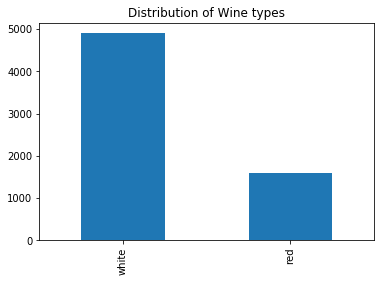

In [0]:
plt.figure()
df_wines.winetype.value_counts().plot(kind = 'bar')
plt.title("Distribution of Wine types")
plt.show()

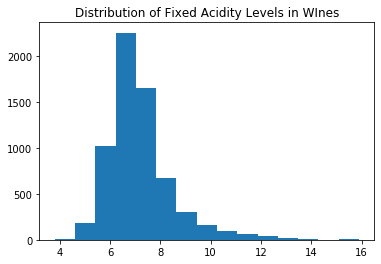

In [0]:
plt.figure()
plt.hist(df_wines.fixed_acidity, bins = 15)
plt.title("Distribution of Fixed Acidity Levels in WInes")
plt.show()

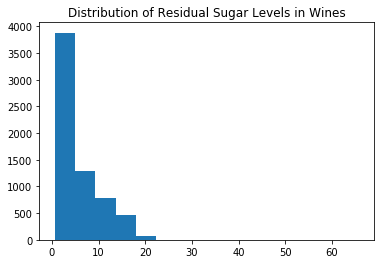

In [0]:
plt.figure()
plt.hist(df_wines.residual_sugar, bins = 15)
plt.title("Distribution of Residual Sugar Levels in Wines")
plt.show()

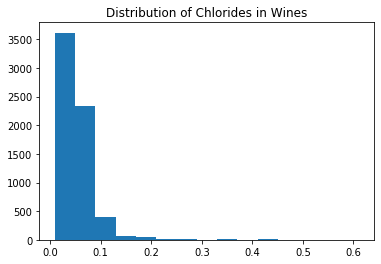

In [0]:
plt.figure()
plt.hist(df_wines.chlorides, bins = 15)
plt.title("Distribution of Chlorides in Wines")
plt.show()

## 2.2 Initial model Training

### 1. Split data into training and test set. 

In [0]:
X_wines = df_wines.drop(['winetype'], axis = 1)
y_wines = df_wines['winetype']

X_train_wines, X_test_wines, y_train_wines, y_test_wines = model_selection\
  .train_test_split(X_wines, y_wines, test_size = 0.2, random_state = 123)

### 2. Build models that evaluate the relationship between all available X variables in the dataset and the target variable. 



### 3. Evaluate with default parameters using cross-validation:

In [0]:
cv_obj = model_selection.StratifiedKFold(n_splits= 10, shuffle = True, random_state= 123)

#### Logistic Regression

In [0]:
log_reg = linear_model.LogisticRegression(penalty = 'none')

model_selection.cross_val_score(log_reg,
                                X_train_wines,
                                y_train_wines,
                                cv = cv_obj,
                                scoring='accuracy').mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9803727582629316

#### Penalized Logistic Regression

In [0]:
pen_log_reg = linear_model.LogisticRegression()

model_selection.cross_val_score(pen_log_reg,
                                X_train_wines,
                                y_train_wines,
                                cv = cv_obj,
                                scoring='accuracy').mean()

#### KNN for classification

In [0]:
knn = neighbors.KNeighborsClassifier()

model_selection.cross_val_score(knn,
                                X_train_wines,
                                y_train_wines,
                                cv = cv_obj,
                                scoring='accuracy').mean()

0.9426574773973616

### 4. How different are the results? 

The results are not very different. The three models give high accuracy scores, above 90%. The unpenalised and penalised logistic regression models both give about 98% accuracy.

### 5. How does scaling the data with StandardScaler influence the results?


In [0]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train_wines)
X_train_wines_scaled = scaler.transform(X_train_wines)

In [0]:
# Logistic Regression
model_selection.cross_val_score(log_reg,
                                X_train_wines_scaled,
                                y_train_wines,
                                cv = cv_obj,
                                scoring='accuracy').mean()

0.9932647843485995

In [0]:
# L2 Logistic Regression
model_selection.cross_val_score(pen_log_reg,
                                X_train_wines_scaled,
                                y_train_wines,
                                cv = cv_obj,
                                scoring='accuracy').mean()

0.9924951830443162

In [0]:
# K Nearest Neighbours
model_selection.cross_val_score(knn,
                                X_train_wines_scaled,
                                y_train_wines,
                                cv = cv_obj,
                                scoring='accuracy').mean()

0.9913405958203647

Results are improved for K Nearest neighbours, going from 94% to 99% accuracy.

Small increases are also seen for the logistic regression models - about 1%. The fact that the models were already close to the maximum possible accuracy likely played a part in this increase being much smaller than the increase for K nearest neighbours.

## 2.3 Tuning Parameters
Tune the parameters where possible using GridSearchCV. Do the results improve?

In [0]:
param_grid_pen_log_reg = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['saga'],
                          'l1_ratio': np.arange(0.1, 1, 0.1)} 
# Choose saga solver because it supports L1, L2, and elasticnet

param_grid_knn = {'n_neighbors': np.arange(1, 15, 2),
                  'p': [1, 2]}

In [0]:
pen_log_reg_grid = model_selection.GridSearchCV(pen_log_reg,                                                                                             
                                                param_grid_pen_log_reg,
                                                scoring='accuracy',
                                                cv = cv_obj
                                                )

knn_grid = model_selection.GridSearchCV(knn,
                                        param_grid_knn,
                                        scoring='accuracy',
                                        cv = cv_obj
                                        )
                                        

In [0]:
pen_log_reg_grid.fit(X_train_wines_scaled, y_train_wines)
knn_grid.fit(X_train_wines_scaled, y_train_wines)

In [0]:
print("Penalised Logistic Regression best score: {:.4f}"\
      .format(pen_log_reg_grid.best_score_))
print("Penalised Logistic Regression best params: {}".format(pen_log_reg_grid.best_params_))
print("k Nearest Neighbours best score: {:.4f}"\
      .format(knn_grid.best_score_))
print("k Nearest Neighbours best params: {}"\
      .format(knn_grid.best_params_))

Penalised Logistic Regression best score: 0.9927
Penalised Logistic Regression best params: {'C': 1, 'l1_ratio': 0.30000000000000004, 'penalty': 'elasticnet', 'solver': 'saga'}
k Nearest Neighbours best score: 0.9948
k Nearest Neighbours best params: {'n_neighbors': 1, 'p': 1}


Again, given that the accuracy scores are near perfect, any improvements are marginal. 
* There is slight improvement for K nearest neighbours using manhattan distance instead of euclidean distance, and only one neighbour instead of the default 5. K Nearest Neighbours performance is now better than logistic regression, penalised or not.

* For logistic regression, iterating over different values of C for L1, L2, and elastic net leaves elastic net as the best penalised logistic regression model. The unpenalised model has slight improvements over the default L2 penalised model in accuracy.

**Note on solver:**

For the gridsearch, saga was used, while lbfgs is the default, used with the default parameters model above. For the gridsearch the saga solver was chosen because it is able to run all regularisation procedures allowed by sklearn and hence could test the L1 and elastic net options. lbfgs skipped over these.

## 2.4 Examining Variation

Do the parameters for models that can be tuned change if:

### 1. You change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling.

In [0]:
# Old CV Object
# cv_obj = model_selection.StratifiedKFold(n_splits= 10,
#                                          shuffle = True,
#                                          random_state= 123)

# Define new CV object

kfold_shuffle = model_selection.KFold(n_splits = 10,
                                      shuffle = True,
                                      random_state = 123
                                      )

In [0]:
pen_log_reg_grid_kfold = model_selection.GridSearchCV(pen_log_reg,
                                                      param_grid_pen_log_reg,
                                                      scoring='accuracy',
                                                      cv = kfold_shuffle
                                                      )

knn_grid_kfold = model_selection.GridSearchCV(knn,
                                              param_grid_knn,
                                              scoring='accuracy',
                                              cv = kfold_shuffle
                                              )

pen_log_reg_grid_kfold.fit(X_train_wines_scaled, y_train_wines)
knn_grid_kfold.fit(X_train_wines_scaled, y_train_wines)
                                        

In [0]:
print("Penalised Logistic Regression best score: {:.4f}"\
      .format(pen_log_reg_grid_kfold.best_score_))
print("Penalised Logistic Regression best params: {}"\
      .format(pen_log_reg_grid_kfold.best_params_))
print("k Nearest Neighbours best score: {:.4f}"\
      .format(knn_grid_kfold.best_score_))
print("k Nearest Neighbours best params: {}"\
      .format(knn_grid_kfold.best_params_))

Penalised Logistic Regression best score: 0.9929
Penalised Logistic Regression best params: {'C': 1, 'l1_ratio': 0.1, 'penalty': 'l1', 'solver': 'saga'}
k Nearest Neighbours best score: 0.9956
k Nearest Neighbours best params: {'n_neighbors': 1, 'p': 1}


 Slight but negligible changes in accuracy scores for both models, amounting to less than a tenth of a percentage point.

Model parameters remain unchanged for K nearest neighbours (manhattan distance, 1 neighbour). Logistic regression has a change in parameters from elastic net to L1 regularisation. The value of C chosen remains unchanged (C = 1).

### 2. You change the random seed of the shuffling?

In [0]:
# Change random seed of kfold_shuffle
kfold_shuffle_456 = model_selection.KFold(n_splits = 10,
                                      shuffle = True,
                                      random_state = 456
                                      )

In [0]:
pen_log_reg_grid_kf_456 = model_selection.GridSearchCV(pen_log_reg,                                                                                             
                                                param_grid_pen_log_reg,
                                                scoring='accuracy',
                                                cv = kfold_shuffle_456
                                                )

knn_grid_kf_456 = model_selection.GridSearchCV(knn,
                                        param_grid_knn,
                                        scoring='accuracy',
                                        cv = kfold_shuffle_456
                                        )

pen_log_reg_grid_kf_456.fit(X_train_wines_scaled, y_train_wines)
knn_grid_kf_456.fit(X_train_wines_scaled, y_train_wines)
                                        

In [0]:
print("Penalised Logistic Regression best score: {:.4f}"\
      .format(pen_log_reg_grid_kf_456.best_score_))
print("Penalised Logistic Regression best params: {}"\
      .format(pen_log_reg_grid_kf_456.best_params_))
print("k Nearest Neighbours best score: {:.4f}"\
      .format(knn_grid_kf_456.best_score_))
print("k Nearest Neighbours best params: {}"\
      .format(knn_grid_kf_456.best_params_))

Penalised Logistic Regression best score: 0.9923
Penalised Logistic Regression best params: {'C': 10, 'l1_ratio': 0.1, 'penalty': 'l1', 'solver': 'saga'}
k Nearest Neighbours best score: 0.9952
k Nearest Neighbours best params: {'n_neighbors': 1, 'p': 1}


Model parameters remain unchanged for K nearest neighbours (manhattan distance, 1 neighbour). Slight but negligible changes in accuracy scores for both models, amounting to less than a tenth of a percentage point.

Best penalised logistic regression parameters change again. L1 is favoured over elastic net, and C = 10 now, rather than 1.

### 3. You change the random state of the split into training and test data?

In [0]:
X_train_wines_456, X_test_wines_456, y_train_wines_456, y_test_wines_456 = model_selection\
  .train_test_split(X_wines, y_wines, test_size = 0.2, random_state = 456)

# Also have to rescale data
scaler = preprocessing.StandardScaler()
scaler.fit(X_train_wines_456)
X_train_wines_scaled_456 = scaler.transform(X_train_wines_456)

In [0]:
pen_log_reg_grid_split_456 = model_selection.GridSearchCV(pen_log_reg,
                                                          param_grid_pen_log_reg,
                                                          scoring='accuracy',
                                                          cv = cv_obj
                                                          )

knn_grid_split_456 = model_selection.GridSearchCV(knn,
                                                  param_grid_knn,
                                                  scoring='accuracy',
                                                  cv = cv_obj
                                                  )

pen_log_reg_grid_split_456.fit(X_train_wines_scaled_456, y_train_wines_456)
knn_grid_split_456.fit(X_train_wines_scaled_456, y_train_wines_456)

In [0]:
print("Penalised Logistic Regression best score: {:.4f}"\
      .format(pen_log_reg_grid_split_456.best_score_))
print("Penalised Logistic Regression best params: {}"\
      .format(pen_log_reg_grid_split_456.best_params_))
print("k Nearest Neighbours best score: {:.4f}"\
      .format(knn_grid_split_456.best_score_))
print("k Nearest Neighbours best params: {}"\
      .format(knn_grid_split_456.best_params_))

Penalised Logistic Regression best score: 0.9925
Penalised Logistic Regression best params: {'C': 1, 'l1_ratio': 0.1, 'penalty': 'l2', 'solver': 'saga'}
k Nearest Neighbours best score: 0.9948
k Nearest Neighbours best params: {'n_neighbors': 7, 'p': 1}


Changing the train/test split has led to a change in the model parameters used by both the logistic regression and K Nearest Neighbours models.

* K Nearest neighbours - Instead of 1 neighbour, the best model now uses 7 neighbours. Manhattan distance is still preferred over euclidean distance
* Penalised logistic regression - L2 regularisation with C = 1 is now preferred over L1 regularisation with C = 1 or C = 10.

As above, changes in accuracy scores are marginal.

## 2.5. Model Selection

Lastly, compare the coefficients for Logistic Regression and Penalized Logistic Regression and discuss which final model you would choose to predict new data.

Since we used the saga solver for the gridsearch, we should train another unpenalised model using saga for a fair comparison(on the initial train/test split, not the new one from part 2.4)

In [0]:
# Remember: the best penalised model from above
print("Penalised Logistic Regression best score: {:.4f}"\
      .format(pen_log_reg_grid.best_score_))
print("Penalised Logistic Regression best params: {}"\
      .format(pen_log_reg_grid.best_params_))

Penalised Logistic Regression best score: 0.9927
Penalised Logistic Regression best params: {'C': 1, 'l1_ratio': 0.30000000000000004, 'penalty': 'elasticnet', 'solver': 'saga'}


In [0]:
# Train new penalised model based on best params, unpenalised model based on
# saga to get coefficients
log_reg_saga = linear_model.LogisticRegression(penalty = 'none',
                                               solver = 'saga')

pen_log_reg_best = linear_model.LogisticRegression(C = 1,
                                                   l1_ratio = 0.30000000000000004,
                                                   penalty='elasticnet',
                                                   solver = 'saga'
                                                   )

In [0]:
log_reg_saga.fit(X_train_wines_scaled, y_train_wines)
pen_log_reg_best.fit(X_train_wines_scaled, y_train_wines)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.30000000000000004,
                   max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='elasticnet', random_state=None, solver='saga',
                   tol=0.0001, verbose=0, warm_start=False)

In [0]:


unpenalised_cv_score = model_selection.cross_val_score(log_reg_saga,
                                                       X_train_wines_scaled,
                                                       y_train_wines,
                                                       cv = cv_obj,
                                                       scoring='accuracy')

print(unpenalised_cv_score.mean())
print(unpenalised_cv_score.std())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

0.9926874907366237
0.003732737550049325


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [0]:
penalised_cv_score = model_selection.cross_val_score(pen_log_reg_best,
                                                     X_train_wines_scaled,
                                                     y_train_wines,
                                                     cv = cv_obj,
                                                     scoring='accuracy')

print(penalised_cv_score.mean())
print(penalised_cv_score.std())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

0.9926874907366237
0.0036323111991036837


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [0]:
wines_coefficients = pd.concat([pd.DataFrame(log_reg_saga.coef_), pd.DataFrame(pen_log_reg_best.coef_)])
wines_coefficients

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.300606,-1.284315,0.412436,3.819057,-0.834916,-0.903192,2.910471,-3.668595,-0.172719,-0.684187,-1.313295,-0.217179
0,-0.397058,-1.267422,0.388571,3.344446,-0.827845,-0.717559,2.721773,-3.229995,-0.272437,-0.708960,-1.093627,-0.205223


In [0]:
wines_coefficients = wines_coefficients\
  .rename(columns = {old: new for old, new in zip (wines_coefficients.columns,
                                                   df_wines.columns)})

wines_coefficients['model'] = ['unpenalised', 'penalised']
wines_coefficients= wines_coefficients.set_index('model')
wines_coefficients

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
model,,,,,,,,,,,,
unpenalised,-0.300606,-1.284315,0.412436,3.819057,-0.834916,-0.903192,2.910471,-3.668595,-0.172719,-0.684187,-1.313295,-0.217179
penalised,-0.397058,-1.267422,0.388571,3.344446,-0.827845,-0.717559,2.721773,-3.229995,-0.272437,-0.708960,-1.093627,-0.205223


The best unpenalised logistic regression model and the best penalised logistic regression model are almost undistinguishable. Both have near perfect accuracy, with the same precise score up to 4 decimal places (0.9927). They also have largely similar variation in their cross validation scores, and coefficients loadings.

Either model would be perfectly fine for implementation, but I would go with unpenalised logistic regression since it is the more basic model. Essentially, you don't need to understand regularisation to use unpenalised logistic regression, but you do need to understand both logisitc regression and regularisation to use the penalised model, so the former is favoured when they are indistinguishable.